<a href="https://colab.research.google.com/github/jihankaruniaa/PCVK_Ganjil_2024/blob/main/Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 9 - Morfologi

1. Import folder drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import Library

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

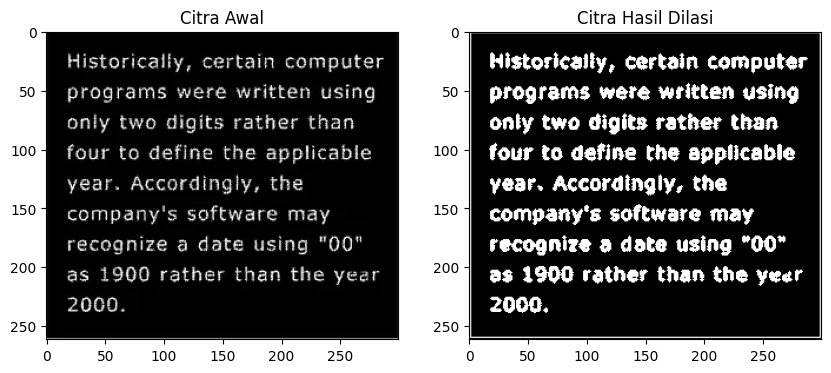

In [5]:
# Function Dilasi
def dilasi_citra(F, w):
    height, width = F.shape

    image_dilasi = np.zeros((height, width), dtype=np.uint8)

    # generate structuring element berbentuk cross
    structure_element = np.array([[0, 1, 0],
                                  [1, 1, 1],
                                  [0, 1, 0]], dtype=np.uint8)
    constant = (w - 1) // 2

    # melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            product = temp * structure_element
            image_dilasi[i, j] = np.max(product)

    return image_dilasi

# Membaca gambar dan mengubah ke grayscale
image_dilasi_a = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/morphology.png', cv2.IMREAD_GRAYSCALE)

# Ukuran SE cross 3x3
w = 3

# Membuat threshold binari
ret, thresh = cv2.threshold(image_dilasi_a, 125, 255, cv2.THRESH_BINARY)

# Melakukan dilasi
dilasi = dilasi_citra(thresh, w)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image_dilasi_a, cmap='gray')

# Gambar hasil dilasi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilasi, cmap='gray')

plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

Structuring Element:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


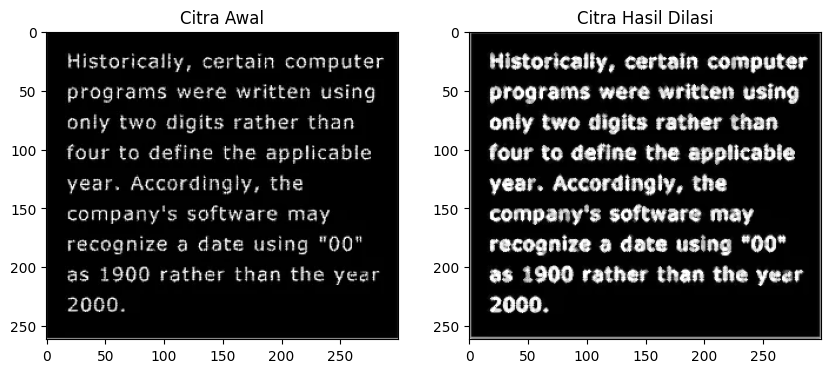

In [6]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/morphology.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk cross 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi menggunakan morphology dari OpenCV
dilasi = cv2.dilate(img, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(img, cmap='gray')

# Gambar hasil dilasi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilasi, cmap='gray')

# Cetak structuring element
print("Structuring Element:")
print(kernel)

plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

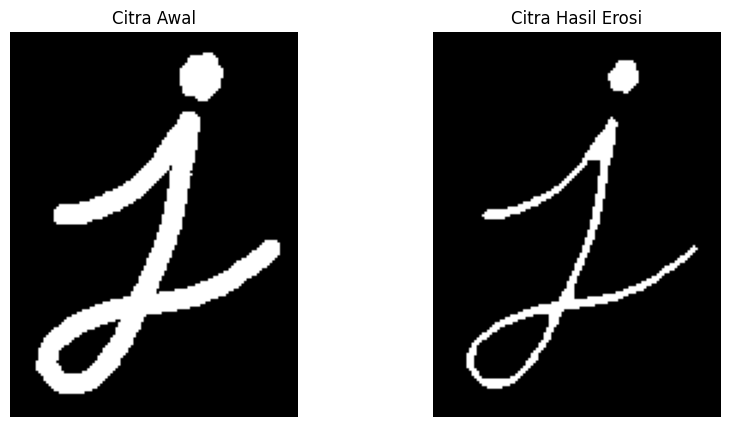

In [7]:
def erosi_citra(F, w):
    height, width, channels = F.shape

    image_erosi = np.zeros((height, width, channels), dtype=np.uint8)

    # Generate structure element (square 5x5 for each channel)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses erosi untuk setiap saluran warna
    for c in range(channels):
        for i in range(constant, height - constant):
            for j in range(constant, width - constant):
                temp = F[i-constant:i+constant+1, j-constant:j+constant+1, c]

                # Melakukan operasi erosi dengan mengambil nilai minimum
                eroded_value = np.min(temp * structure_element)

                image_erosi[i, j, c] = eroded_value

    return image_erosi

# Membaca gambar dalam mode warna
image_erosi_a = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png')

# Menentukan ukuran kernel
w = 5

# Melakukan erosi
hasil_erosi = erosi_citra(image_erosi_a, w)

# Menampilkan gambar asli dan hasil erosi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(cv2.cvtColor(image_erosi_a, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk tampilan yang benar
plt.axis('off')

# Gambar hasil erosi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(hasil_erosi)
plt.axis('off')

plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

Structuring Element:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


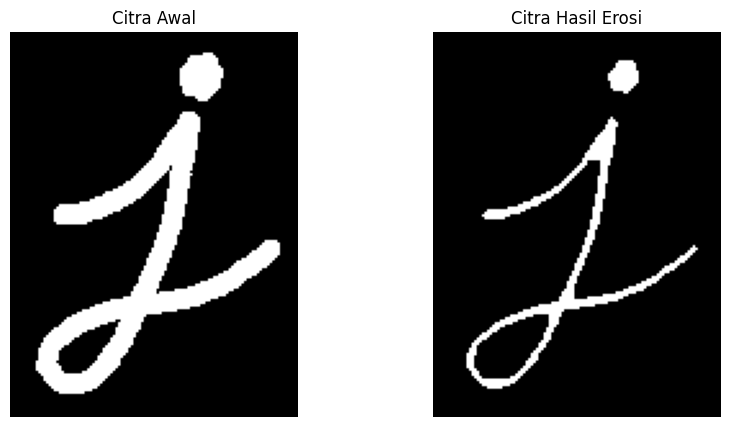

In [8]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 5x5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Melakukan operasi erosi menggunakan morphology dari OpenCV
erosi = cv2.erode(img, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(img, cmap='gray')
plt.axis('off')

# Gambar hasil erosi
plt.subplot(1, 2, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(erosi, cmap='gray')
plt.axis('off')

# Cetak structuring element
print("Structuring Element:")
print(kernel)

plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

Tanpa Library Morphology

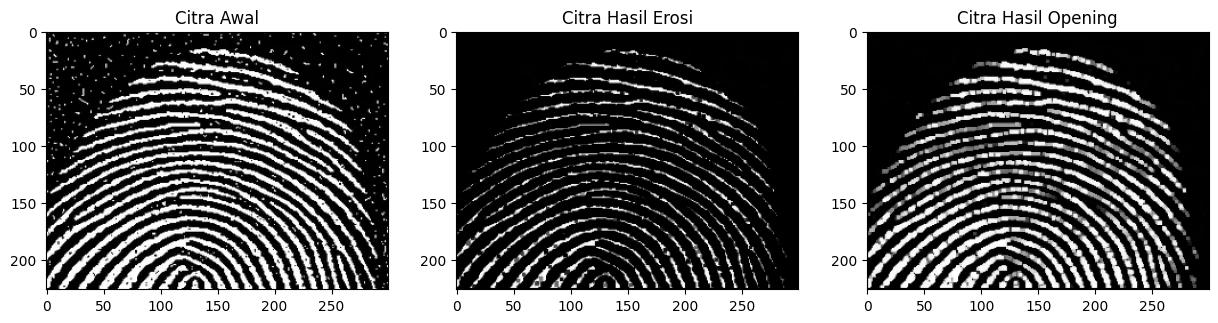

In [9]:
def erosi_citra(F, w):
    height, width = F.shape
    image_erosi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses erosi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            eroded_value = np.min(temp * structure_element)
            image_erosi[i, j] = eroded_value

    return image_erosi

def opening_citra(F, w):
    # Proses Opening: Erosi diikuti oleh Dilasi
    eroded_image = erosi_citra(F, w)
    dilated_image = dilasi_citra(eroded_image, w)
    return dilated_image

def dilasi_citra(F, w):
    height, width = F.shape
    image_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            image_dilasi[i, j] = np.max(temp * structure_element)

    return image_dilasi

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Ukuran structuring element
w = 3

# Hasil erosi dan opening
hasil_erosi = erosi_citra(image, w)
hasil_opening = opening_citra(image, w)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')

# Gambar hasil erosi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Erosi')
plt.imshow(hasil_erosi, cmap='gray')

# Gambar hasil opening
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Opening')
plt.imshow(hasil_opening, cmap='gray')

plt.show()

Dengan Library Morphology

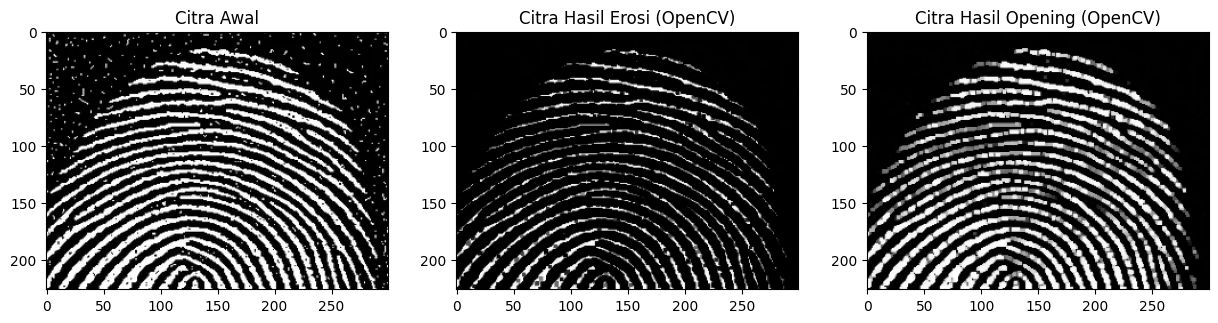

In [10]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi erosi menggunakan morphology dari OpenCV
erosi_opencv = cv2.erode(img, kernel)

# Melakukan operasi opening menggunakan morphology dari OpenCV
opening_opencv = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(img, cmap='gray')

# Gambar hasil erosi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Erosi (OpenCV)')
plt.imshow(erosi_opencv, cmap='gray')

# Gambar hasil opening
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Opening (OpenCV)')
plt.imshow(opening_opencv, cmap='gray')

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

Tanpa Library Morphology

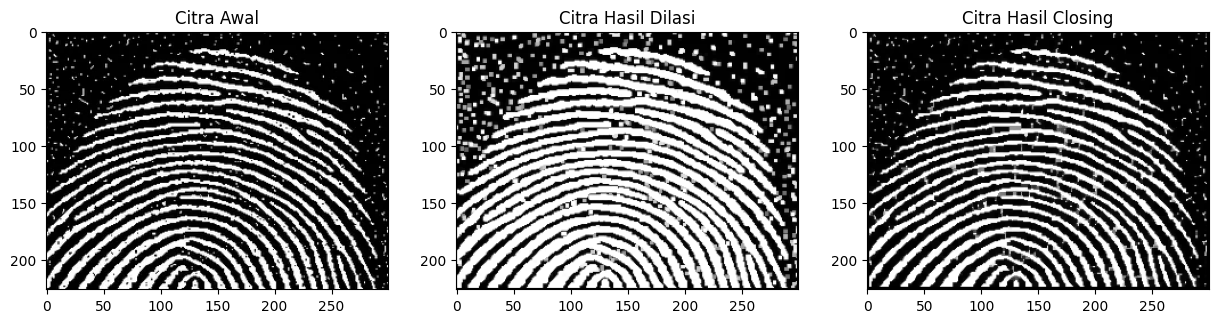

In [11]:
def dilasi_citra(F, w):
    height, width = F.shape
    image_dilasi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses dilasi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            image_dilasi[i, j] = np.max(temp * structure_element)

    return image_dilasi

def closing_citra(F, w):
    # Proses Closing: Dilasi diikuti oleh Erosi
    dilated_image = dilasi_citra(F, w)
    eroded_image = erosi_citra(dilated_image, w)
    return eroded_image

def erosi_citra(F, w):
    height, width = F.shape
    image_erosi = np.zeros((height, width), dtype=np.uint8)

    # Generate structure element (square w x w)
    structure_element = np.ones((w, w), dtype=np.uint8)
    constant = (w - 1) // 2

    # Melakukan proses erosi
    for i in range(constant, height - constant):
        for j in range(constant, width - constant):
            temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
            eroded_value = np.min(temp * structure_element)
            image_erosi[i, j] = eroded_value

    return image_erosi

# Membaca gambar dalam mode grayscale
image = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Ukuran structuring element
w = 3

# Hasil dilasi dan closing
hasil_dilasi = dilasi_citra(image, w)
hasil_closing = closing_citra(image, w)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')

# Gambar hasil dilasi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(hasil_dilasi, cmap='gray')

# Gambar hasil closing
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Closing')
plt.imshow(hasil_closing, cmap='gray')

plt.show()

Dengan Library Morphology

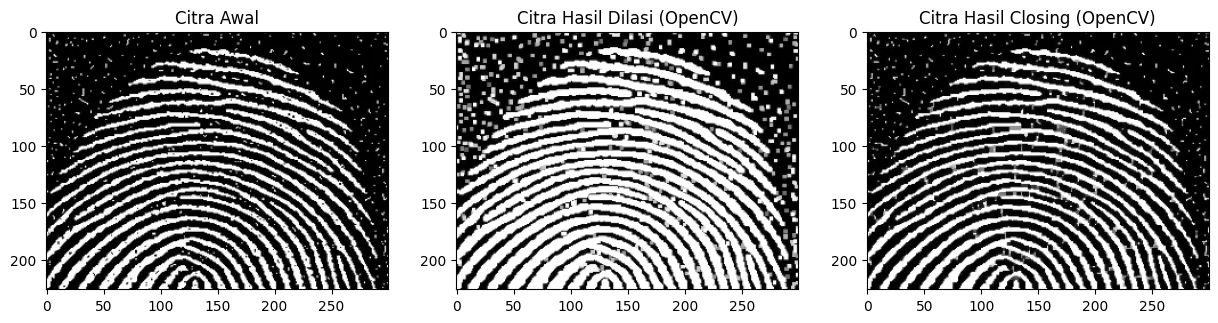

In [12]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Melakukan operasi dilasi menggunakan morphology dari OpenCV
dilasi_opencv = cv2.dilate(img, kernel)

# Melakukan operasi closing menggunakan morphology dari OpenCV
closing_opencv = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Citra Awal')
plt.imshow(img, cmap='gray')

# Gambar hasil dilasi
plt.subplot(1, 3, 2)
plt.title('Citra Hasil Dilasi (OpenCV)')
plt.imshow(dilasi_opencv, cmap='gray')

# Gambar hasil closing
plt.subplot(1, 3, 3)
plt.title('Citra Hasil Closing (OpenCV)')
plt.imshow(closing_opencv, cmap='gray')

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

SED = Cross3


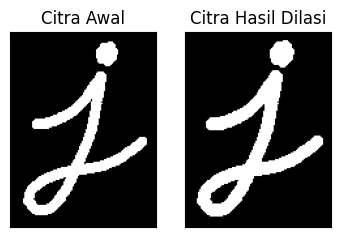

SED = Cross 5


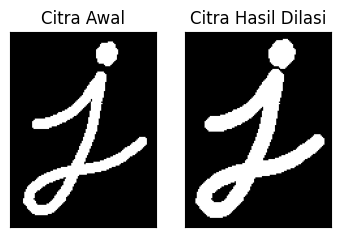

In [13]:
# dilasi cross sed
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product=temp*SED
      imgD[i,j]=np.max(product)
  return imgD

print('SED = Cross3')
img_d=cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png',0)
ret,thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD=dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap='gray')
plt.title('Citra Awal'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap='gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]),plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

10.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

SED = Circle 3


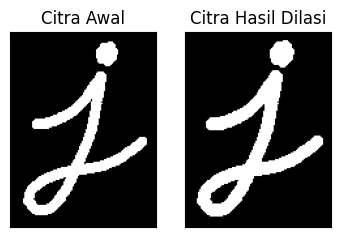

SED = Circle 5


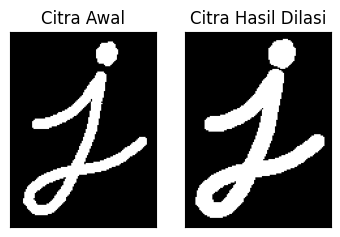

In [14]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

SE = Rectangle 3x5


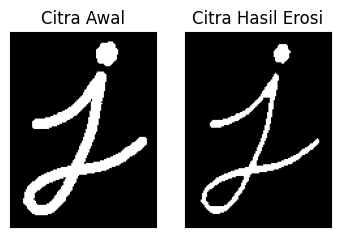

SE = Rectangle 5x7


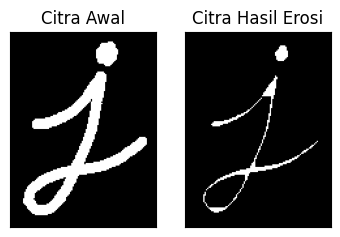

In [15]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

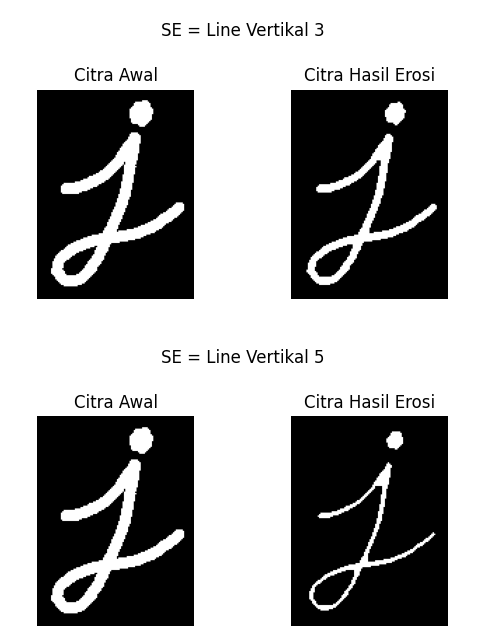

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def erosi_citra(F, k):
    # Ukuran gambar
    m, n = F.shape

    # Membuat Structuring Element (SE) berbentuk line vertikal
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))  # SE line vertikal
    constant = (k - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Membaca gambar dalam mode grayscale
img_e = cv2.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/j.png', 0)

# Melakukan thresholding
ret1, thresh1 = cv2.threshold(img_e, 127, 255, cv2.THRESH_BINARY)

# Erosi dengan SE line vertikal 3
k = 3
imgE_3 = erosi_citra(thresh1, k)

# Erosi dengan SE line vertikal 5
k = 5
imgE_5 = erosi_citra(thresh1, k)

# Menampilkan hasil
plt.figure(figsize=(6, 8))  # Sesuaikan ukuran gambar untuk membuat lebih rapat
gs = GridSpec(4, 2, height_ratios=[0.2, 1, 0.2, 1], hspace=0.3)

# Baris pertama: SE = Line Vertikal 3
plt.subplot(gs[0, :])
plt.text(0.5, 0.5, "SE = Line Vertikal 3", ha='center', va='center', fontsize=12)
plt.axis('off')

plt.subplot(gs[1, 0])
plt.imshow(thresh1, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(gs[1, 1])
plt.imshow(imgE_3, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

# Baris kedua: SE = Line Vertikal 5
plt.subplot(gs[2, :])
plt.text(0.5, 0.5, "SE = Line Vertikal 5", ha='center', va='center', fontsize=12)
plt.axis('off')

plt.subplot(gs[3, 0])
plt.imshow(thresh1, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(gs[3, 1])
plt.imshow(imgE_5, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()
